# Einleitung: Temperaturvorhersage

In diesem Kapitel wollen wir uns zum ersten Mal mit maschinellem Lernen beschäftigen. Dazu greifen wir ein einfaches und anschauliches Beispiel heraus: die Vorhersage der Temperatur für den nächsten Tag.

Wir gehen davon aus, dass wir die Temperaturen der letzten n Tage (einschließlich heute) haben. Sagen wir mal n=5. Auf Basis dieser beschränkten Informationen wollen wir nun versuchen die Temperatur von morgen vorherzusagen:

    Eingabe:
    Temperatur vor 4 Tagen
    Temperatur vor 3 Tagen
    Temperatur vor 2 Tagen
    Temperatur vor 1 Tag (gestern)
    Temperatur heute
    
    Ausgabe:
    Temperatur von morgen
    
Klar, dass das nur beschränkt gehen wird. Ein Meteorologe wird uns da sicherlich gleich warnen und sagen, dass wir da viel mehr Informationen brauchen als nur die Temperaturen der letzten Tage. Aber wir wollen einfach mal schauen, wie weit wir kommen.

Dazu vergleichen wir gleich einige sehr einfache Verfahren mit Verfahren des maschinellen Lernens: dabei lernt der Computer selbständig durch viele Beispiele, wie man von den Temperaturen der vergangenen Tagen und auf die Temperatur von morgen schließen kann.

Dazu brauchen wir aber erstmal ...

# Datensatzauswahl

Für das maschinelle Lernen brauchen wir stets Daten. Diese sind aber dank Webseiten wie beispielsweise [Kaggle](https://www.kaggle.com) heute über das Internet leicht verfügbar.

Der folgende Kaggle-Datensatz

    Weather archive Jena
    https://www.kaggle.com/pankrzysiu/weather-archive-jena

enthält beispielsweise Wetterinformationen wie Lufttemperatur, Atmossphärischer Druck, Feuchtigkeit, etc. zur Stadt Jena, die über 8 Jahre im Zeitraum 2009-2016 aufgenommen wurden.

Die Daten können auch vom direkten Ursprungsort heruntergeladen werden:

    Max-Planck Institut für Biogeochemie, Jena
    Wetterstation Beutenberg
    https://www.bgc-jena.mpg.de/wetter/
    https://www.bgc-jena.mpg.de/wetter/weather_data.html
    
Sie sind nach der CC BY 4.0 Lizenz nutzbar: https://creativecommons.org/licenses/by/4.0/deed.de

D.h. Sie dürfen die Daten teilen, das Material in jedwedem Format oder Medium vervielfältigen, nutzen (auch kommerziell), weiterverbreiten und sogar verändern, müssen aber den obigen Namen und den Link zur Lizenz dabei hinzufügen.

Wenn man die Daten direkt von Kaggle herunterlädt, erhält man eine `.csv` Datei namens `jena_climate_2009_2016.csv`.

# Datensatz einlesen

Zum Einlesen des Datensatzes verwenden wir die Python-Bibliothek `Pandas`:

In [1]:
import pandas

In [2]:
daten = pandas.read_csv("daten/wetter_datensatz/jena_climate_2009_2016.csv")

Wir erhalten eine Tabelle namens `daten` (Datentyp: Pandas DataFrame):

In [3]:
daten

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


Man kann durch den ersten Blick auf die Tabelle schon einiges erkennen:

- wir haben sehr viele Merkmale pro Zeitstempel: es gibt 14 verschiedene Merkmale, darunter auch die Lufttemperatur `T`
- wir haben sehr viele Daten: 0.42 Millionen Zeilen mit jeweils 14 Merkmalen!
- die zeitliche Abtastung der Merkmale beträgt 10 Minuten, d.h. alle 10 Minuten wurden die 14 Merkmale neu gemessen und abgespeichert

Eigentlich wollten wir doch nur einen Temperaturwert pro Tag. Wie können wir das erreichen?

# Datensatz aufbereiten (Datum als Index)

Sagen wir mal, wir wollen immer nur für jeden Tag die Temperatur mittags. Dazu schauen wir uns erstmal an, ob Pandas versteht, dass in der Spalte `Date Time` ein Datum+Uhrzeit steht:

In [4]:
daten.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

Leider noch nicht! Die Spalte `Date Time` wurde so eingelesen, dass dort eine Zeichenkette (= Datentyp `object`) gespeichert wird. Aber kein Problem! Das können wir ändern:

In [5]:
daten["Zeitstempel"] = pandas.to_datetime( daten["Date Time"], format="%d.%m.%Y %H:%M:%S" )

Die Formatierungsmöglichkeiten bzw. Platzhalter für den gewünschten Aufbau des Datums und der Uhrzeit kann man hier nachlesen:

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Beachten Sie jetzt die neue Spalte `Zeitstempel`:

In [6]:
daten[:3]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Zeitstempel
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009-01-01 00:10:00
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009-01-01 00:20:00
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009-01-01 00:30:00


Ein Blick auf den Datentyp pro Spalte zeigt auch, dass es jetzt in der Spalte `Zeitstempel` wirklich ein Datums-/Zeit-Datentyp `datetime64` verwendet wird:

In [7]:
daten.dtypes

Date Time                  object
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
Zeitstempel        datetime64[ns]
dtype: object

Jetzt bauen wir eine Tabelle `daten2` zusammen, die nur über ein paar aller Merkmale (Spalten) verfügt:

In [8]:
ausgewaehlte_merkmale = ["T (degC)", "p (mbar)"]
daten2 = daten[ ausgewaehlte_merkmale ]

In [9]:
daten2

,T (degC),p (mbar)
0,-8.02,996.52
1,-8.41,996.57
2,-8.51,996.53
3,-8.31,996.51
4,-8.27,996.51
...,...,...
420546,-4.05,1000.07
420547,-3.35,999.93
420548,-3.16,999.82
420549,-4.23,999.81


Und jetzt möchten wir noch auf die einzelnen Zeilen nicht über Zeilennummern zugreifen, sondern wünschen uns Datum/Zeit als Indizierungsmöglichkeit

In [10]:
daten2.index = daten[ "Zeitstempel" ]

In [11]:
daten2

,T (degC),p (mbar)
Zeitstempel,,
2009-01-01 00:10:00,-8.02,996.52
2009-01-01 00:20:00,-8.41,996.57
2009-01-01 00:30:00,-8.51,996.53
2009-01-01 00:40:00,-8.31,996.51
2009-01-01 00:50:00,-8.27,996.51
...,...,...
2016-12-31 23:20:00,-4.05,1000.07
2016-12-31 23:30:00,-3.35,999.93
2016-12-31 23:40:00,-3.16,999.82


# Zugriff auf Daten über Zeitstempel

Jetzt sind die Datenzeilen nicht mehr durchnummiert von 0-420551, sondern haben einen anderen Index: den Zeitstempel. Was bringt uns das? Wir können jetzt auf die Daten auf eine viel natürlichere Art zugreifen, um Fragen zu beantworten:

## Temperatur zu einem bestimmten Zeitpunkt

In [12]:
daten2.loc["2012-01-06 12:00"]

,T (degC),p (mbar)
Zeitstempel,,
2012-01-06 12:00:00,3.67,983.63


## Durchschnittstemperatur für einen Tag

In [13]:
daten2.loc["2012-01-06"]

,T (degC),p (mbar)
Zeitstempel,,
2012-01-06 00:00:00,3.11,966.85
2012-01-06 00:10:00,3.11,967.00
2012-01-06 00:20:00,3.17,967.03
2012-01-06 00:30:00,3.16,967.27
2012-01-06 00:40:00,3.13,967.56
...,...,...
2012-01-06 23:10:00,2.12,992.06
2012-01-06 23:20:00,2.11,992.08
2012-01-06 23:30:00,2.27,992.27


In [14]:
daten2.loc["2012-01-06"].mean()

T (degC)      2.484583
p (mbar)    981.556319
dtype: float64

## Temperaturverlaufsgraph für einen Tag

In [15]:
zr = daten2.loc["2012-01-06"]["T (degC)"]
zr

Zeitstempel
2012-01-06 00:00:00    3.11
2012-01-06 00:10:00    3.11
2012-01-06 00:20:00    3.17
2012-01-06 00:30:00    3.16
2012-01-06 00:40:00    3.13
                       ... 
2012-01-06 23:10:00    2.12
2012-01-06 23:20:00    2.11
2012-01-06 23:30:00    2.27
2012-01-06 23:40:00    2.40
2012-01-06 23:50:00    2.48
Name: T (degC), Length: 144, dtype: float64

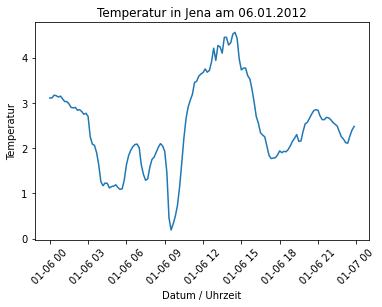

In [16]:
import matplotlib.pyplot as plt

plt.plot(zr)
plt.xticks(rotation=45)
plt.xlabel("Datum / Uhrzeit")
plt.ylabel("Temperatur")
plt.title("Temperatur in Jena am 06.01.2012")
plt.show()

## Durchschnittstemperatur für einen Monat

In [17]:
daten2.loc["2012-07-01" : "2012-07-31"]

,T (degC),p (mbar)
Zeitstempel,,
2012-07-01 00:00:00,19.83,987.24
2012-07-01 00:10:00,19.19,987.15
2012-07-01 00:20:00,18.73,986.79
2012-07-01 00:30:00,18.32,986.01
2012-07-01 00:40:00,18.22,986.20
...,...,...
2012-07-31 23:10:00,15.62,992.46
2012-07-31 23:20:00,15.76,992.47
2012-07-31 23:30:00,15.67,992.51


## Temperaturverlaufsgraph für einen Monat

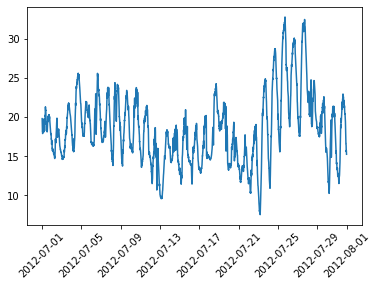

In [18]:
zr = daten2.loc["2012-07-01" : "2012-07-31"]["T (degC)"]

plt.plot( zr )
plt.xticks(rotation=45)
plt.show()

## Quiz: Temperaturen vergleichen über Jahre

Aufgabe: Erstellen Sie ein Balkendiagramm, das die Durchschnittstemperatur der Sommermonate (Juni, Juli, August) der Jahre 2009-2016 gegenbüber stellt.

Tipp: Ein Balkendiagramm können Sie mit `Matplotlib` so erstellen:

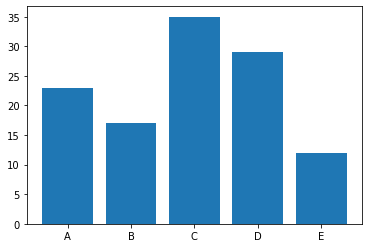

In [19]:
plt.bar( ['A', 'B', 'C', 'D', 'E'], [23,17,35,29,12] )
plt.show()

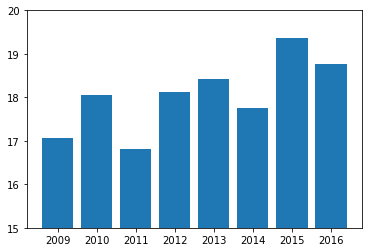

In [20]:
sommer2009 = daten2.loc["2009-06-01" : "2009-08-31"]["T (degC)"].mean()
sommer2010 = daten2.loc["2010-06-01" : "2010-08-31"]["T (degC)"].mean()
sommer2011 = daten2.loc["2011-06-01" : "2011-08-31"]["T (degC)"].mean()
sommer2012 = daten2.loc["2012-06-01" : "2012-08-31"]["T (degC)"].mean()
sommer2013 = daten2.loc["2013-06-01" : "2013-08-31"]["T (degC)"].mean()
sommer2014 = daten2.loc["2014-06-01" : "2014-08-31"]["T (degC)"].mean()
sommer2015 = daten2.loc["2015-06-01" : "2015-08-31"]["T (degC)"].mean()
sommer2016 = daten2.loc["2016-06-01" : "2016-08-31"]["T (degC)"].mean()

plt.bar( ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], 
         [sommer2009, sommer2010, sommer2011, sommer2012, sommer2013, sommer2014, sommer2015, sommer2016], 
       )
plt.ylim(15,20)
plt.show()

Wie können wir diese Aufgabe denn *eleganter*, im Sinne von *kompakteren Code*, lösen?

Dazu helfen uns formatierte Strings:

In [21]:
jahr = 2009
zeichenkette = f"{jahr}-06-01"
print(zeichenkette)

2009-06-01


Jetzt können wir die einzelnen Listen einfach mit einer Schleife erstellen:

In [22]:
for jahr in range(2009,2017):
    print(jahr)

2009
2010
2011
2012
2013
2014
2015
2016


Was wir auch noch wissen müssen, ist wie man Listenelemente in Python nach und nach hinzfügen kann:

In [23]:
liste = []
liste.append(1)
liste.append(2)
liste.append(3)
liste

[1, 2, 3]

Jetzt können wir alles zusammen setzen:

In [24]:
jahreszahlen = []
temperaturen = []

for jahr in range(2009,2017):
    sommer_temperatur = daten2.loc[ f"{jahr}-06-01" : f"{jahr}-08-31"]["T (degC)"].mean()
    
    jahreszahlen.append( jahr )
    temperaturen.append( sommer_temperatur )
    
print(jahreszahlen)
print(temperaturen)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
[17.072598882850205, 18.04447207287931, 16.801209239130348, 18.11855978260875, 18.421126207729486, 17.754065071336854, 19.353999849033798, 18.775608393719807]


Wenn wir die Daten in diesen Listen vorbereitet haben, können wir den Plot rasch erzeugen:

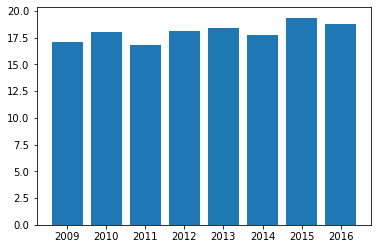

In [25]:
plt.bar( jahreszahlen, temperaturen )
plt.show()

Der Python-Profi würde diese Aufgabe vielleicht noch kompakter mit der sogenannten `List Comprehension` machen:

In [26]:
[i**2 for i in range(1,6)]

[1, 4, 9, 16, 25]

Bei der `List Comprehension` werden also Listen *on the fly* erzeugt. Man speichert sie nicht in Variablen, weil sie nur kurzfristig gebraucht werden:

In [27]:
[jahr for jahr in range(2009,2017)]

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [28]:
[daten2.loc[ f"{jahr}-06-01" : f"{jahr}-08-31"]["T (degC)"].mean() for jahr in range(2009,2017)]

[17.072598882850205,
 18.04447207287931,
 16.801209239130348,
 18.11855978260875,
 18.421126207729486,
 17.754065071336854,
 19.353999849033798,
 18.775608393719807]

Und jetzt alles in einem Plot:

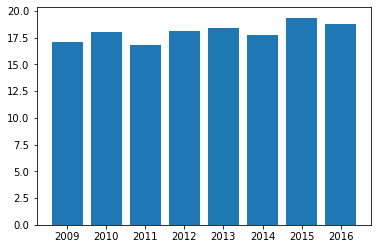

In [29]:
plt.bar( [jahr for jahr in range(2009,2017)],
         [daten2.loc[ f"{jahr}-06-01" : f"{jahr}-08-31"]["T (degC)"].mean() for jahr in range(2009,2017)] )
plt.show()

Ergibt also genau das gleiche Diagramm! Zugegeben: für Python-Anfänger aber etwas schwerer verdaulich...

# Daten filtern

Wir haben also jetzt in `daten2` eine Tabelle, die u.a. die Temperaturen der Jahre 2009-2016 für Jena enthält:

In [30]:
daten2.head()

,T (degC),p (mbar)
Zeitstempel,,
2009-01-01 00:10:00,-8.02,996.52
2009-01-01 00:20:00,-8.41,996.57
2009-01-01 00:30:00,-8.51,996.53
2009-01-01 00:40:00,-8.31,996.51
2009-01-01 00:50:00,-8.27,996.51


In [31]:
daten2.tail()

,T (degC),p (mbar)
Zeitstempel,,
2016-12-31 23:20:00,-4.05,1000.07
2016-12-31 23:30:00,-3.35,999.93
2016-12-31 23:40:00,-3.16,999.82
2016-12-31 23:50:00,-4.23,999.81
2017-01-01 00:00:00,-4.82,999.82


Wir wollen die Daten jetzt nochmal reduzieren, weil wir nur die Mittagstemperatur als Eingabe verwenden wollen und auch vorhersagen wollen. Da hilft uns die Pandas DataFrame Methode/Funktion `at_time()`:

In [32]:
daten3 = daten2.at_time("12:00")
daten3

,T (degC),p (mbar)
Zeitstempel,,
2009-01-01 12:00:00,-6.87,1000.30
2009-01-02 12:00:00,-3.12,998.91
2009-01-03 12:00:00,-5.96,999.02
2009-01-04 12:00:00,-1.21,988.94
2009-01-05 12:00:00,-3.65,990.42
...,...,...
2016-12-27 12:00:00,5.78,1006.57
2016-12-28 12:00:00,6.16,1014.16
2016-12-29 12:00:00,3.49,1014.72


2921 Zeilen hat die neue Tabelle. Überlegen Sie kurz: kann das sein?

In [33]:
8 * 365

2920

Daten für 8 Jahre. Eine Temperatur pro Tag haben wir herausgefiltert (die um die Mittagszeit). Ergebnis klingt plausibel. Schaltjahre gibt es ja auch noch...

Plotten wir mal die ganze Zeitreihe:

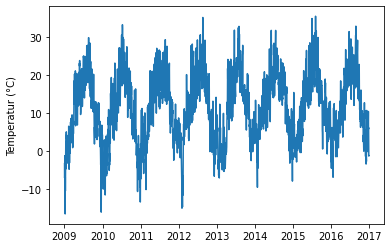

In [34]:
plt.plot( daten3["T (degC)"] )
plt.ylabel("Temperatur (°C)")
plt.show()

Man sieht sehr gut die Sommer- und Winterzeiten der 8 Jahre anhand des Temperaturverlaufs.

# Aufspalten der Daten zum Training und Testen

Die Jahre 2009-2015 wollen wir als Trainingsdaten haben. Die Daten vom Jahr 2016 halten wir aus dem Training raus. Das sollen unsere Testdaten werden, um zu schauen, wie gut unser Modell (Algorithmus) später Temperaturen vorhersagen kann:

In [35]:
data_train = daten3.loc["2009-01-01 12:00:00" : "2015-12-31 12:00:00"]["T (degC)"]
data_train

Zeitstempel
2009-01-01 12:00:00    -6.87
2009-01-02 12:00:00    -3.12
2009-01-03 12:00:00    -5.96
2009-01-04 12:00:00    -1.21
2009-01-05 12:00:00    -3.65
                       ...  
2015-12-27 12:00:00    11.30
2015-12-28 12:00:00     6.31
2015-12-29 12:00:00     4.70
2015-12-30 12:00:00     4.49
2015-12-31 12:00:00     2.92
Name: T (degC), Length: 2559, dtype: float64

In [36]:
data_test = daten3.loc["2016-01-01 12:00:00" : "2016-12-31 12:00:00"]["T (degC)"]
data_test

Zeitstempel
2016-01-01 12:00:00   -0.03
2016-01-02 12:00:00   -0.97
2016-01-03 12:00:00   -0.62
2016-01-04 12:00:00   -2.79
2016-01-05 12:00:00   -1.64
                       ... 
2016-12-27 12:00:00    5.78
2016-12-28 12:00:00    6.16
2016-12-29 12:00:00    3.49
2016-12-30 12:00:00   -1.31
2016-12-31 12:00:00   -1.19
Name: T (degC), Length: 362, dtype: float64

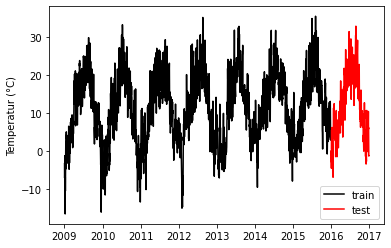

In [37]:
plt.plot( data_train, color="black", label="train" )
plt.plot( data_test,  color="red",   label="test" )
plt.legend()
plt.ylabel("Temperatur (°C)")
plt.show()

In [70]:
data_train.shape

(2559,)

In [71]:
data_test.shape

(362,)

# Erzeugen der Trainingsbeispiele

Für das Maschinelle Lernen brauchen wir Trainingsbeispiele der Form `(x,y)` mit:

    x = (Temperatur vorgestern, Temperatur gestern, Temperatur heute)
    y = (Temperatur morgen)
    
oder allgemeiner:

    x = (t1,t2,t3,...,tn)
    y = (tn+1,tn+2, ..., tn+m)
    
wenn wir die Temperaturen der letzten `n` Tage als Eingabe nehmen und die Temperaturen der nächsten `m` Tage vorhersagen wollen.

Um unsere Trainings- und Testdaten in solche Trainingsbeispiele umzuwandeln, schreiben wir eine kleine Hilfsfunktion:

In [215]:
import numpy as np

zr = [i for i in range(100)]

def zr_in_beispiele_umwandeln(zr, n=3, m=1):
    
    anz_beispiele = len(zr)-n-m+1
    
    print( f"Generiere {anz_beispiele} Beispiele..." )
    
    x_train = np.zeros( (anz_beispiele, n) )
    y_train = np.zeros( (anz_beispiele, m) ) 
    
    for i in range(anz_beispiele):
    
        x_vec = zr[i:i+n]
        y_vec = zr[i+n:i+n+m]
        
        x_train[i] = x_vec
        y_train[i] = y_vec
        
    return x_train, y_train

In [217]:
anz_inputs  = 14
anz_outputs = 1

x_train, y_train = zr_in_beispiele_umwandeln( zr, anz_inputs, anz_outputs )
print(x_train[:3])
print(y_train[:3])

Generiere 86 Beispiele...
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]]
[[14.]
 [15.]
 [16.]]


Diese neue Hilfsfunktion können wir jetzt auf unsere Trainings- und Testzeitreihe anwenden:

In [218]:
x_train, y_train = zr_in_beispiele_umwandeln( data_train.values, anz_inputs, anz_outputs )
print(x_train[:3])
print(y_train[:3])

Generiere 2545 Beispiele...
[[ -6.87  -3.12  -5.96  -1.21  -3.65 -14.52 -16.5   -6.84 -10.47  -7.48
   -7.12  -3.64   2.58  -4.68]
 [ -3.12  -5.96  -1.21  -3.65 -14.52 -16.5   -6.84 -10.47  -7.48  -7.12
   -3.64   2.58  -4.68   1.99]
 [ -5.96  -1.21  -3.65 -14.52 -16.5   -6.84 -10.47  -7.48  -7.12  -3.64
    2.58  -4.68   1.99  -2.85]]
[[ 1.99]
 [-2.85]
 [ 0.7 ]]


Die ersten Trainingsbeispiele sollten so für Sie Sinn machen, wenn Sie sich analog die ersten Werte der Trainingsdaten-Zeitreihe mal anschauen:

In [219]:
data_train.values[:10]

array([ -6.87,  -3.12,  -5.96,  -1.21,  -3.65, -14.52, -16.5 ,  -6.84,
       -10.47,  -7.48])

Das Gleiche machen wir nun mit den Testdaten:

In [220]:
x_test, y_test = zr_in_beispiele_umwandeln( data_test.values, anz_inputs, anz_outputs )
print(x_test[:3])
print(y_test[:3])

Generiere 348 Beispiele...
[[-0.03 -0.97 -0.62 -2.79 -1.64 -4.5   0.89  5.53  0.45  5.63  4.58  6.2
   3.98  3.23]
 [-0.97 -0.62 -2.79 -1.64 -4.5   0.89  5.53  0.45  5.63  4.58  6.2   3.98
   3.23  1.61]
 [-0.62 -2.79 -1.64 -4.5   0.89  5.53  0.45  5.63  4.58  6.2   3.98  3.23
   1.61  0.14]]
[[ 1.61]
 [ 0.14]
 [-2.49]]


In [221]:
data_test.values[:10]

array([-0.03, -0.97, -0.62, -2.79, -1.64, -4.5 ,  0.89,  5.53,  0.45,
        5.63])

Mit diesen vorbereiteten Trainings- und Testdaten können wir nun *Machine Learning (Maschinelles Lernen)* betreiben!

# Base line Verfahren / Modell

Um später zu sehen, wie gut verschiedene Machine Learning Modelle sind, um aus diesen vorbereiten Daten Zusammenhänge zwischen den letzten Temperaturen und der vorhersagten Temperatur zu erlernen, implementieren wir jetzt ein sehr einfaches Base line Verfahren (Modell):

wir nehmen einfach als vorhergesagte Temperatur die Temperatur von heute!

In [222]:
class baseline1:
    
    def predict(self, alte_temperaturen):        
        vorhersage = alte_temperaturen[-1]
        return vorhersage
    
m1 = baseline1()

In [223]:
m1.predict( [10,12,14] )

14

In [224]:
m1.predict( [20,15,10] )

10

# Funktion zur Bewertung eines Modells

Um jetzt ein konkretes Modell zu bewerten können wir durch die Testbeispiele laufen und jeweils die vorhergesagte Temperatur mit der tatsächlichen Temperatur vergleichen:

In [266]:
import numpy as np

def berechne_modell_fehler(modell, x_test, y_test, reshape_to_2d=False, scaler_output=None):
    
    N = x_test.shape[0]
    
    print( f"Modell wird getestet auf {N} Testbeispielen...")
    
    summe_fehler = 0
    for i in range(N):
        
        x = x_test[i]
        y = y_test[i]
        #print(x, "-->", y)
        
        t_ist = y[0]
        
        # der Input für die predict-Methode
        # eines Keras-Modells muss 2-dimensional sein
        if reshape_to_2d:
            x = x.reshape(1,-1)
            
        t_vorhergesagt = modell.predict( x )
        
        if scaler_output != None:
            
            t_vorhergesagt = scaler_output.inverse_transform( t_vorhergesagt )
        
        if reshape_to_2d:
            t_vorhergesagt = t_vorhergesagt[0][0]
        
        fehler = abs(t_ist - t_vorhergesagt)
        print( f"ist: {t_ist:.2f} vs. vorhergesagt: {t_vorhergesagt:.2f} --> fehler: {fehler:.2f}" )
        
        summe_fehler += fehler
        
    fehler_durchschnitt = summe_fehler / N
    print( f"Durchschnittsfehler: {fehler_durchschnitt}" )
    
#berechne_modell_fehler(m1, x_test, y_test)

# Quiz: Eigene Idee zur Temperaturvorhersage ausprobieren

- Erstellen Sie ein neues base line Modell `baseline2`, bei der Sie die Temperaturvorhersage nach einem anderen Prinzip vorhersagen.

- Testen Sie dann mittels der Funktion `berechne_modell_fehler` wie gut Ihr Modell Temperaturen vorhersagen kann!

In [226]:
class baseline2:
    
    def predict(self, alte_temperaturen):
        vorhersage = alte_temperaturen.mean()
        return vorhersage
    
m2 = baseline2()

In [227]:
berechne_modell_fehler(m2, x_test, y_test)

Modell wird getestet auf 348 Testbeispielen...
Durchschnittsfehler: 3.6515804597701167


In [228]:
class baseline3:
    
    def predict(self, alte_temperaturen):
        vorhersage = alte_temperaturen[-3]*0.2 + \
                     alte_temperaturen[-2]*0.3 + \
                     alte_temperaturen[-1]*0.5
        return vorhersage
    
m3 = baseline3()

In [229]:
berechne_modell_fehler(m3, x_test, y_test)

Modell wird getestet auf 348 Testbeispielen...
Durchschnittsfehler: 2.837589080459769


In [230]:
class baseline4:
    
    def predict(self, alte_temperaturen):
        t_differenz_heute_gestern = alte_temperaturen[-1] - alte_temperaturen[-2]
        vorhersage = alte_temperaturen[-1] + t_differenz_heute_gestern
        return vorhersage
    
m4 = baseline4()

In [231]:
berechne_modell_fehler(m4, x_test, y_test)

Modell wird getestet auf 348 Testbeispielen...
Durchschnittsfehler: 3.6741091954023006


# Daten normalisieren

In [256]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
x_train_normalized = scaler_input.fit_transform(x_train)
x_test_normalized = scaler_input.transform(x_test)

scaler_output = MinMaxScaler(feature_range=(0, 1))
y_train_normalized = scaler_output.fit_transform(y_train)
y_test_normalized = scaler_output.transform(y_test)

In [257]:
x_train_normalized.shape

(2545, 14)

In [258]:
x_train_normalized[:3]

array([[0.18547766, 0.25770416, 0.20300462, 0.29449153, 0.24749615,
        0.03813559, 0.        , 0.17862002, 0.10806608, 0.16618076,
        0.17317784, 0.24081633, 0.3617104 , 0.22060253],
       [0.25770416, 0.20300462, 0.29449153, 0.24749615, 0.03813559,
        0.        , 0.18605547, 0.10806608, 0.16618076, 0.17317784,
        0.24081633, 0.3617104 , 0.22060253, 0.35024295],
       [0.20300462, 0.29449153, 0.24749615, 0.03813559, 0.        ,
        0.18605547, 0.11614022, 0.16618076, 0.17317784, 0.24081633,
        0.3617104 , 0.22060253, 0.35024295, 0.25617104]])

In [259]:
x_test_normalized[:3]

array([[0.3172188 , 0.29911402, 0.30585516, 0.26406009, 0.28620955,
        0.23112481, 0.33493837, 0.41904762, 0.32031098, 0.42099125,
        0.40058309, 0.43206997, 0.38892128, 0.37434402],
       [0.29911402, 0.30585516, 0.26406009, 0.28620955, 0.23112481,
        0.33493837, 0.42430663, 0.32031098, 0.42099125, 0.40058309,
        0.43206997, 0.38892128, 0.37434402, 0.34285714],
       [0.30585516, 0.26406009, 0.28620955, 0.23112481, 0.33493837,
        0.42430663, 0.32646379, 0.42099125, 0.40058309, 0.43206997,
        0.38892128, 0.37434402, 0.34285714, 0.31428571]])

# Neuronales Netz zur Temperaturvorhersage

Wir wollen jetzt ein Neuronales Netz mit den Trainingsdaten trainieren:

Hier nochmal ein Blick auf die Inputvektoren:

In [260]:
x_train_normalized

array([[0.18547766, 0.25770416, 0.20300462, ..., 0.24081633, 0.3617104 ,
        0.22060253],
       [0.25770416, 0.20300462, 0.29449153, ..., 0.3617104 , 0.22060253,
        0.35024295],
       [0.20300462, 0.29449153, 0.24749615, ..., 0.22060253, 0.35024295,
        0.25617104],
       ...,
       [0.41872111, 0.45050077, 0.56413713, ..., 0.5654033 , 0.53119534,
        0.43420797],
       [0.45050077, 0.56413713, 0.53023883, ..., 0.53119534, 0.43420797,
        0.40291545],
       [0.56413713, 0.53023883, 0.46128659, ..., 0.43420797, 0.40291545,
        0.39883382]])

In [261]:
x_train_normalized.shape

(2545, 14)

Und die dazugehörigen Outputvektoren:

In [262]:
y_train_normalized

array([[0.35024295],
       [0.25617104],
       [0.32517007],
       ...,
       [0.40291545],
       [0.39883382],
       [0.36831876]])

In [263]:
y_train_normalized.shape

(2545, 1)

Jetzt bauen wir mittels TensorFlow ein MLP auf:

In [264]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(50,
                             activation="relu",
                             input_shape=(anz_inputs,)))
model.add(keras.layers.Dense(1,                             
                             activation="linear"))


my_optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=my_optimizer,
              loss=tf.keras.losses.MeanSquaredError())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


Und jetzt trainieren wir das Modell:

In [265]:
history = model.fit(x_train_normalized,
                    y_train_normalized,
                    epochs=300)

Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 0.0353
Epoch 2/300
80/80 [==============================] - ETA: 0s - loss: 0.010 - 0s 2ms/step - loss: 0.0108
Epoch 3/300
80/80 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4/300
80/80 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 6/300
80/80 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 8/300
80/80 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 9/300
80/80 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 10/300
80/80 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 11/300
80/80 [==============================] - 0s 961us/step - loss: 0.0084
Epoch 12/300
80/80 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 13/30

# Neuronales Netz testen

In [267]:
berechne_modell_fehler(model, x_test_normalized, y_test, reshape_to_2d=True, scaler_output=scaler_output)

Modell wird getestet auf 348 Testbeispielen...
ist: 1.61 vs. vorhergesagt: 4.64 --> fehler: 3.03
ist: 0.14 vs. vorhergesagt: 3.55 --> fehler: 3.41
ist: -2.49 vs. vorhergesagt: 1.55 --> fehler: 4.04
ist: -3.03 vs. vorhergesagt: 1.63 --> fehler: 4.66
ist: -5.98 vs. vorhergesagt: 0.53 --> fehler: 6.51
ist: -0.49 vs. vorhergesagt: -1.59 --> fehler: 1.10
ist: -1.70 vs. vorhergesagt: -0.95 --> fehler: 0.75
ist: -6.87 vs. vorhergesagt: -0.16 --> fehler: 6.71
ist: 4.18 vs. vorhergesagt: -2.52 --> fehler: 6.70
ist: 3.38 vs. vorhergesagt: 0.53 --> fehler: 2.85
ist: 7.51 vs. vorhergesagt: 3.11 --> fehler: 4.40
ist: 9.53 vs. vorhergesagt: 4.16 --> fehler: 5.37
ist: 11.33 vs. vorhergesagt: 3.69 --> fehler: 7.64
ist: 8.17 vs. vorhergesagt: 8.07 --> fehler: 0.10
ist: 6.78 vs. vorhergesagt: 4.84 --> fehler: 1.94
ist: 7.67 vs. vorhergesagt: 4.81 --> fehler: 2.86
ist: 4.01 vs. vorhergesagt: 7.17 --> fehler: 3.16
ist: 12.10 vs. vorhergesagt: 4.92 --> fehler: 7.18
ist: 12.47 vs. vorhergesagt: 7.05 --> feh